<a href="https://colab.research.google.com/github/MBillahsust/Being_Stoic/blob/main/2_Fast_face_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Face Recognition Sytem

In [100]:
import os
import cv2
import numpy as np
import pandas as pd
!pip install insightface
!pip install onnxruntime
!pip install onnxruntime-gpu==1.15.1 # Install onnxruntime-gpu (if using GPU)


from insightface.app import FaceAnalysis

In [101]:

# configure face analysis
faceapp = FaceAnalysis(name='buffalo_sc',
                       root='insightface_model',
                       providers=['CPUExecutionProvider'])

faceapp.prepare(ctx_id=0, det_size=(640,640), det_thresh=0.5)
# warning: don't set det_thresh < 0.3

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/det_500m.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: insightface_model/models/buffalo_sc/w600k_mbf.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


In [102]:
# faceapp.get()

In [103]:
# prompt: drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Extract Facial Features and labels

In [104]:
import re # regular expression

In [105]:
def clean_name(string):
    # Allow only A-Z a-z and 0-9
    string = re.sub(r'[^A-Za-z0-9]',' ',string)
    string = string.title()
    return string

In [106]:
person_info = []
pth = '/content/drive/MyDrive/A.0/images'
listdir = os.listdir(path=pth)
# print(listdir)
for folder_name in listdir:
    role, name = folder_name.split('-')
    name = clean_name(name)
    role = clean_name(role)
    print('Role =',role,end='\t')
    print('Name =', name)

    # path of each image in respective folder
    img_files = os.listdir(path= f'/content/drive/MyDrive/A.0/images/{folder_name}')
    # print(img_files)
    for file in img_files:
        path = f'/content/drive/MyDrive/A.0/images/{folder_name}/{file}'
        # step-1: read the image
        img_arr = cv2.imread(path)

        # Check if the image was loaded successfully
        if img_arr is not None:
            # step-2: get the info
            result = faceapp.get(img_arr,max_num=1) # return list

            # print(len(result))
            if len(result) > 0:
                # step-3: extract facial embedding
                res = result[0]
                embedding = res['embedding']
                # step-4: save all info name, role, embedding in a list
                person_info.append([name, role, embedding])
                print(name)
        else:
            print(f"Warning: Could not load image at path: {path}")
# person_info = []
# pth = '/content/drive/MyDrive/A.0/images'
# listdir = os.listdir(path=pth)
# # print(listdir)
# for folder_name in listdir:
#     role, name = folder_name.split('-')
#     name = clean_name(name)
#     role = clean_name(role)
#     print('Role =',role,end='\t')
#     print('Name =', name)

#     # path of each image in respective folder
#     img_files = os.listdir(path= f'/content/drive/MyDrive/A.0/images/{folder_name}')
#     # print(img_files)
#     for file in img_files:
#         path = f'/content/drive/MyDrive/A.0/images/{folder_name}/{file}'
#         # step-1: read the image
#         img_arr = cv2.imread(path)

#         # step-2: get the info
#         result = faceapp.get(img_arr,max_num=1) # return list

#         # print(len(result))
#         if len(result) > 0:
#             # step-3: extract facial embedding
#             res = result[0]
#             embedding = res['embedding']
#             # step-4: save all info name, role, embedding in a list
#             person_info.append([name, role, embedding])
#             print(name)



Role = Teacher	Name = Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Morgan Freeman
Role = Student	Name = Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Chris Evans
Role = Student	Name = Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Scarlett Johansson
Role = Teacher	Name = Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Barack Obama
Role = Student	Name = Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Angelina Jolie
Role = Student	Name = Nafees
Nafees
Nafees
Nafees
Nafees
Nafees
Nafees
Nafee

In [107]:
dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
dataframe # store in redis
unique_names = dataframe['Name'].unique()
print(unique_names)
# print(dataframe)
# dataframe = pd.DataFrame(person_info,columns=['Name','Role','Facial_Features'])
# Save the dataframe to a CSV file named 'facial_data.csv'
# dataframe.to_csv('facial_data.csv', index=False)


['Morgan Freeman' 'Chris Evans' 'Scarlett Johansson' 'Barack Obama'
 'Angelina Jolie' 'Nafees' 'Prosanto' 'Sj' 'Nayem' 'Akshay Kumar']


## Inference

![feature_ex.jpg](attachment:feature_ex.jpg)

#### step-1: read image

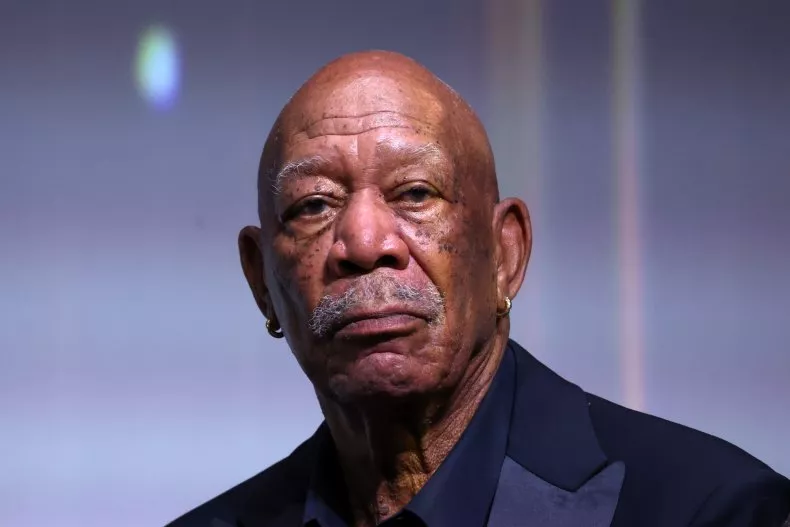

In [108]:
# read test image
from google.colab.patches import cv2_imshow
img_test = cv2.imread('/content/drive/MyDrive/A.0/2_Fast_Face_Recognition_System/test_images/morgan-freeman-looking-camera.webp')
cv2_imshow(img_test)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### step -2: Extract Feature

In [109]:
res_test = faceapp.get(img_test,max_num=1)
for i, rt in enumerate(res_test):
    print('current loop =',i)
    bbox = rt['bbox'].astype(int)
    score = int(rt['det_score']*100)
    embed_test = rt['embedding']


current loop = 0


In [110]:
# consider only one sample
len(embed_test)

512

In [111]:
embed_test

array([ 5.37329376e-01,  9.07642007e-01, -1.20994377e+00,  9.73333836e-01,
        4.62261736e-01,  2.95257330e-01,  2.24960279e+00,  2.49748516e+00,
        6.48090720e-01, -8.31711173e-01,  3.50422651e-01, -9.96205091e-01,
        4.89323914e-01, -7.03577518e-01,  2.44253948e-01,  4.12123859e-01,
        5.35526648e-02, -2.44536591e+00, -1.58025980e+00,  2.47145295e-02,
        1.31219673e+00,  7.25021362e-01, -1.08100176e+00,  5.86845160e-01,
       -9.37637568e-01, -3.91351998e-01,  3.50580692e-01,  1.83885014e+00,
        4.89789367e-01,  1.44859648e+00, -8.56486738e-01, -1.44277275e+00,
        4.49109286e-01,  6.49483725e-02, -4.56151485e-01,  1.56623721e-01,
        1.05811965e+00,  8.59555542e-01,  1.62295985e+00,  3.58932853e-01,
       -1.32986164e+00,  1.19451940e+00,  6.82051301e-01,  1.51372999e-01,
        1.97062683e+00, -9.10039246e-01,  2.50384140e+00,  3.01370233e-01,
       -2.33944607e+00, -9.01626170e-01,  2.44729698e-01, -2.76803315e-01,
       -2.23079205e+00,  

#### Algorithm

![algorithm.svg](attachment:algorithm.svg)

In [112]:
X_list =  dataframe['Facial_Features'].tolist()
X = np.asarray(X_list)

In [113]:
X.shape

(100, 512)

In [114]:
from sklearn.metrics import pairwise

In [115]:
y = embed_test.reshape(1,512) # 1 x 512

equlidean_distance = pairwise.euclidean_distances(X,y)
manhattan_distance = pairwise.manhattan_distances(X,y)
cosine_similar = pairwise.cosine_similarity(X,y)

In [116]:
data_search = dataframe.copy()
data_search['equlidean'] = equlidean_distance
data_search['manhattan'] = manhattan_distance
data_search['cosine'] = cosine_similar

In [117]:
data_search.head(2)

Name     Role                                    Facial_Features  \
0  Morgan Freeman  Teacher  [-0.27468443, -0.2753064, -0.84154445, 1.27969...   
1  Morgan Freeman  Teacher  [1.2278079, -1.5642701, 0.42995828, 0.9718561,...   

   equlidean   manhattan    cosine  
0  22.373184  416.321976  0.659279  
1  27.032545  476.707356  0.493060

In [118]:
import matplotlib.pyplot as plt

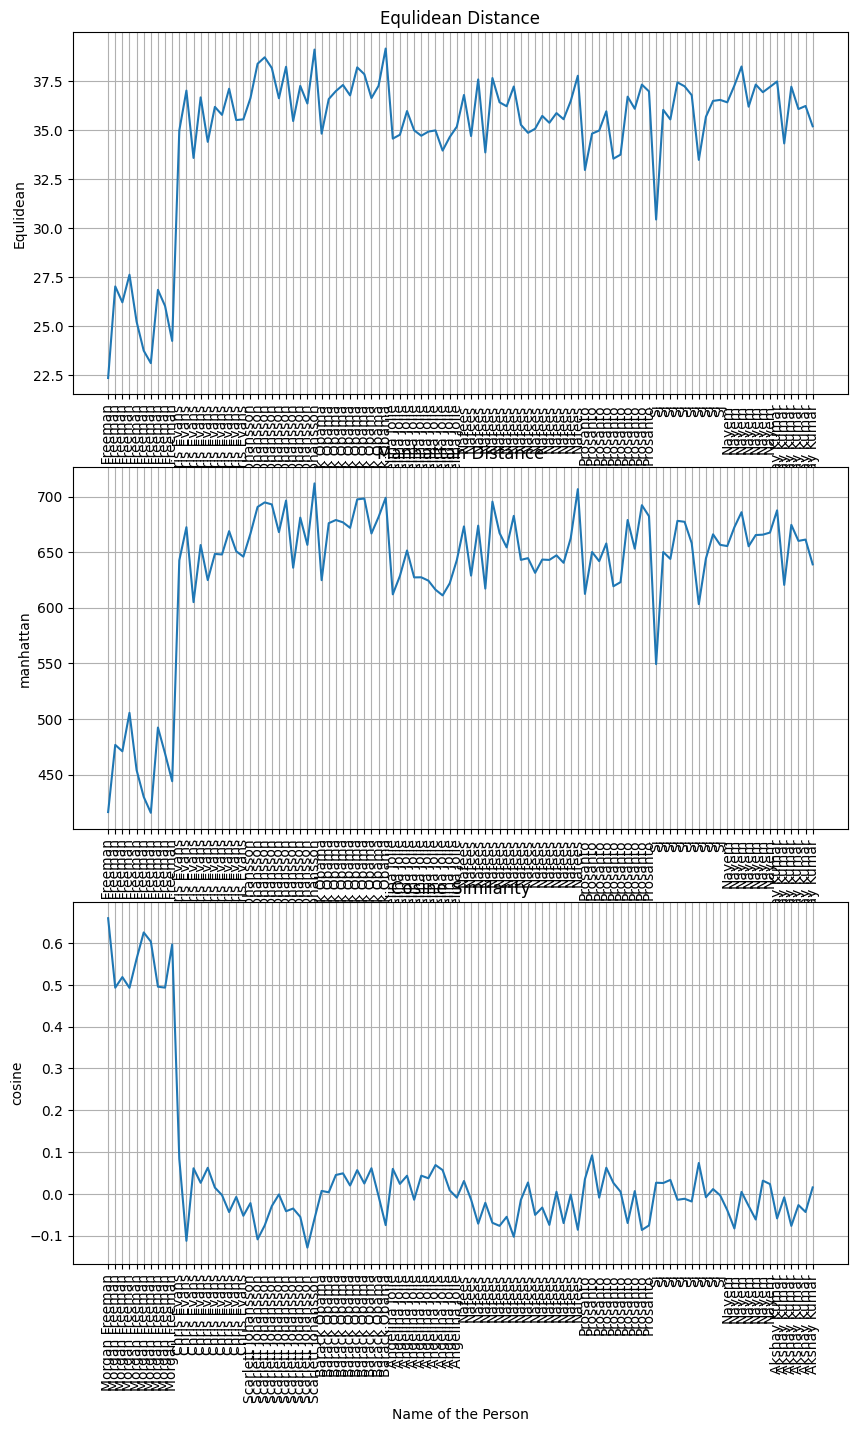

In [119]:
plt.figure(figsize=(10,16))
plt.subplot(3,1,1)
plt.plot(data_search['equlidean'],)
plt.xticks(ticks=list(range(len(data_search['equlidean']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('Equlidean')
plt.title('Equlidean Distance')
plt.grid()

plt.subplot(3,1,2)
plt.plot(data_search['manhattan'],)
plt.xticks(ticks=list(range(len(data_search['manhattan']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('manhattan')
plt.title('Manhattan Distance')
plt.grid()


plt.subplot(3,1,3)
plt.plot(data_search['cosine'],)
plt.xticks(ticks=list(range(len(data_search['cosine']))),
           labels=data_search['Name'],rotation=90)
plt.xlabel('Name of the Person')
plt.ylabel('cosine')
plt.title('Cosine Similarity')
plt.grid()


plt.show()

### Identify the Person using Equlidean Distance

In [120]:
d_eq_optimal = 25

In [121]:
datafilter = data_search.query(f'equlidean < {d_eq_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['equlidean'].argmin()
    name , role = datafilter.loc[argmin][['Name','Role']]

else:
    name = 'Unknown'
    role = 'Unknown'

In [122]:
print(name, role)

Morgan Freeman Teacher


### Identify the Person using Manhattan Distance

In [123]:
d_man_optimal = 450

In [124]:
datafilter = data_search.query(f'manhattan < {d_man_optimal}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmin = datafilter['manhattan'].argmin()
    name_man , role_man = datafilter.loc[argmin][['Name','Role']]

else:
    name_man = 'Unknown'
    role_man = 'Unknown'

In [125]:
print(name, role)

Morgan Freeman Teacher


### Identify the Person using Cosine Similarity

In [126]:
S_opt = 0.4

In [127]:
datafilter = data_search.query(f'cosine > {S_opt}')
datafilter.reset_index(drop=True,inplace=True)

if len(datafilter) > 0:
    argmax = datafilter['cosine'].argmax()
    name_cos , role_cos = datafilter.loc[argmax][['Name','Role']]

else:
    name_cos = 'Unknown'
    role_cos = 'Unknown'

In [128]:
print(name_cos, role_cos)

Morgan Freeman Teacher


In [129]:
datafilter

Name     Role                                    Facial_Features  \
0  Morgan Freeman  Teacher  [-0.27468443, -0.2753064, -0.84154445, 1.27969...   
1  Morgan Freeman  Teacher  [1.2278079, -1.5642701, 0.42995828, 0.9718561,...   
2  Morgan Freeman  Teacher  [0.7716732, -0.6371075, 0.1712926, 0.55135304,...   
3  Morgan Freeman  Teacher  [-0.2606339, 0.020522118, -0.41956586, 1.67549...   
4  Morgan Freeman  Teacher  [0.48640934, -0.4775918, -1.0033873, 1.2773727...   
5  Morgan Freeman  Teacher  [0.42446506, -1.3469219, -0.6576085, 1.7243186...   
6  Morgan Freeman  Teacher  [1.2917784, -0.94640553, -0.1353631, 1.0459716...   
7  Morgan Freeman  Teacher  [0.79333276, -0.48215386, -1.7259705, 0.651349...   
8  Morgan Freeman  Teacher  [0.5248391, -0.52419454, -0.51587707, 0.827002...   
9  Morgan Freeman  Teacher  [-0.13147733, 0.04087484, 0.62813395, 0.683366...   

   equlidean   manhattan    cosine  
0  22.373184  416.321976  0.659279  
1  27.032545  476.707356  0.493060  
2  26.223322  470.954798  0.518468  
3  27.630499  505.512153  0.492625  
4  25.239092  454.073135  0.562218  
5  23.763538  429.991332  0.625246  
6  23.127655  415.651696  0.603467  
7  26.858780  492.329342  0.495450  
8  26.037922  468.937453  0.493234  
9  24.259201  444.045571  0.596458

### Identify Multiple Person in an Image

In [130]:
def ml_search_algorithm(dataframe,feature_column,test_vector,
                        name_role=['Name','Role'],thresh=0.5):
    """
    cosine similarity base search algorithm
    """
    # step-1: take the dataframe (collection of data)
    dataframe = dataframe.copy()
    # step-2: Index face embeding from the dataframe and convert into array
    X_list = dataframe[feature_column].tolist()
    x = np.asarray(X_list)

    # step-3: Cal. cosine similarity
    similar = pairwise.cosine_similarity(x,test_vector.reshape(1,-1))
    similar_arr = np.array(similar).flatten()
    dataframe['cosine'] = similar_arr

    # step-4: filter the data
    data_filter = dataframe.query(f'cosine >= {thresh}')
    if len(data_filter) > 0:
        # step-5: get the person name
        data_filter.reset_index(drop=True,inplace=True)
        argmax = data_filter['cosine'].argmax()
        person_name, person_role = data_filter.loc[argmax][name_role]

    else:
        person_name = 'Unknown'
        person_role = 'Unknown'

    return person_name, person_role

In [147]:
# dataframe_compress = dataframe.groupby(by=['Name','Role']).mean()
# dataframe_compress.reset_index(inplace=True)
dataframe_compress = dataframe
dataframe_compress

Name     Role                                    Facial_Features
0   Morgan Freeman  Teacher  [-0.27468443, -0.2753064, -0.84154445, 1.27969...
1   Morgan Freeman  Teacher  [1.2278079, -1.5642701, 0.42995828, 0.9718561,...
2   Morgan Freeman  Teacher  [0.7716732, -0.6371075, 0.1712926, 0.55135304,...
3   Morgan Freeman  Teacher  [-0.2606339, 0.020522118, -0.41956586, 1.67549...
4   Morgan Freeman  Teacher  [0.48640934, -0.4775918, -1.0033873, 1.2773727...
..             ...      ...                                                ...
95    Akshay Kumar  Teacher  [-0.7410533, -1.2989358, -0.36881223, -0.12851...
96    Akshay Kumar  Teacher  [-2.4111545, -1.5981556, 0.48009497, 0.2140365...
97    Akshay Kumar  Teacher  [0.48364428, -1.5768386, 0.7841616, 1.229337, ...
98    Akshay Kumar  Teacher  [0.08614112, 0.6338904, -0.4275201, -0.2978109...
99    Akshay Kumar  Teacher  [-0.9694768, -1.5433751, 0.09713781, 0.4909409...

[100 rows x 3 columns]

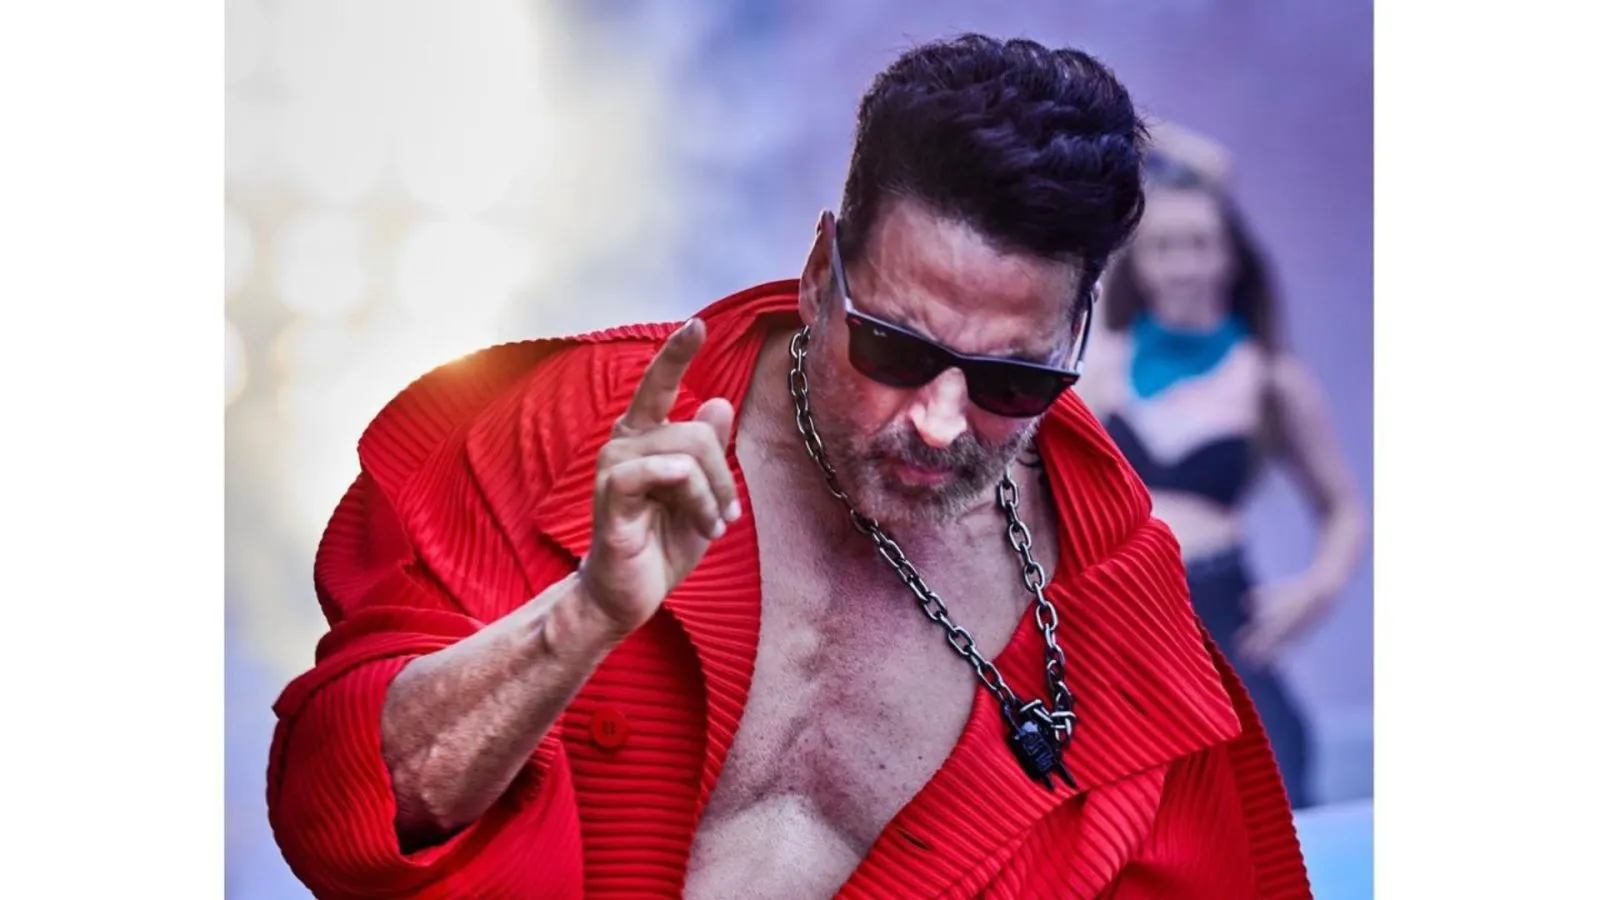

In [152]:
pptth = '/content/drive/MyDrive/A.0/2_Fast_Face_Recognition_System/test_images/AK-1600x900.webp'
test_image = cv2.imread(pptth)
cv2_imshow(test_image)
cv2.waitKey()
cv2.destroyAllWindows()

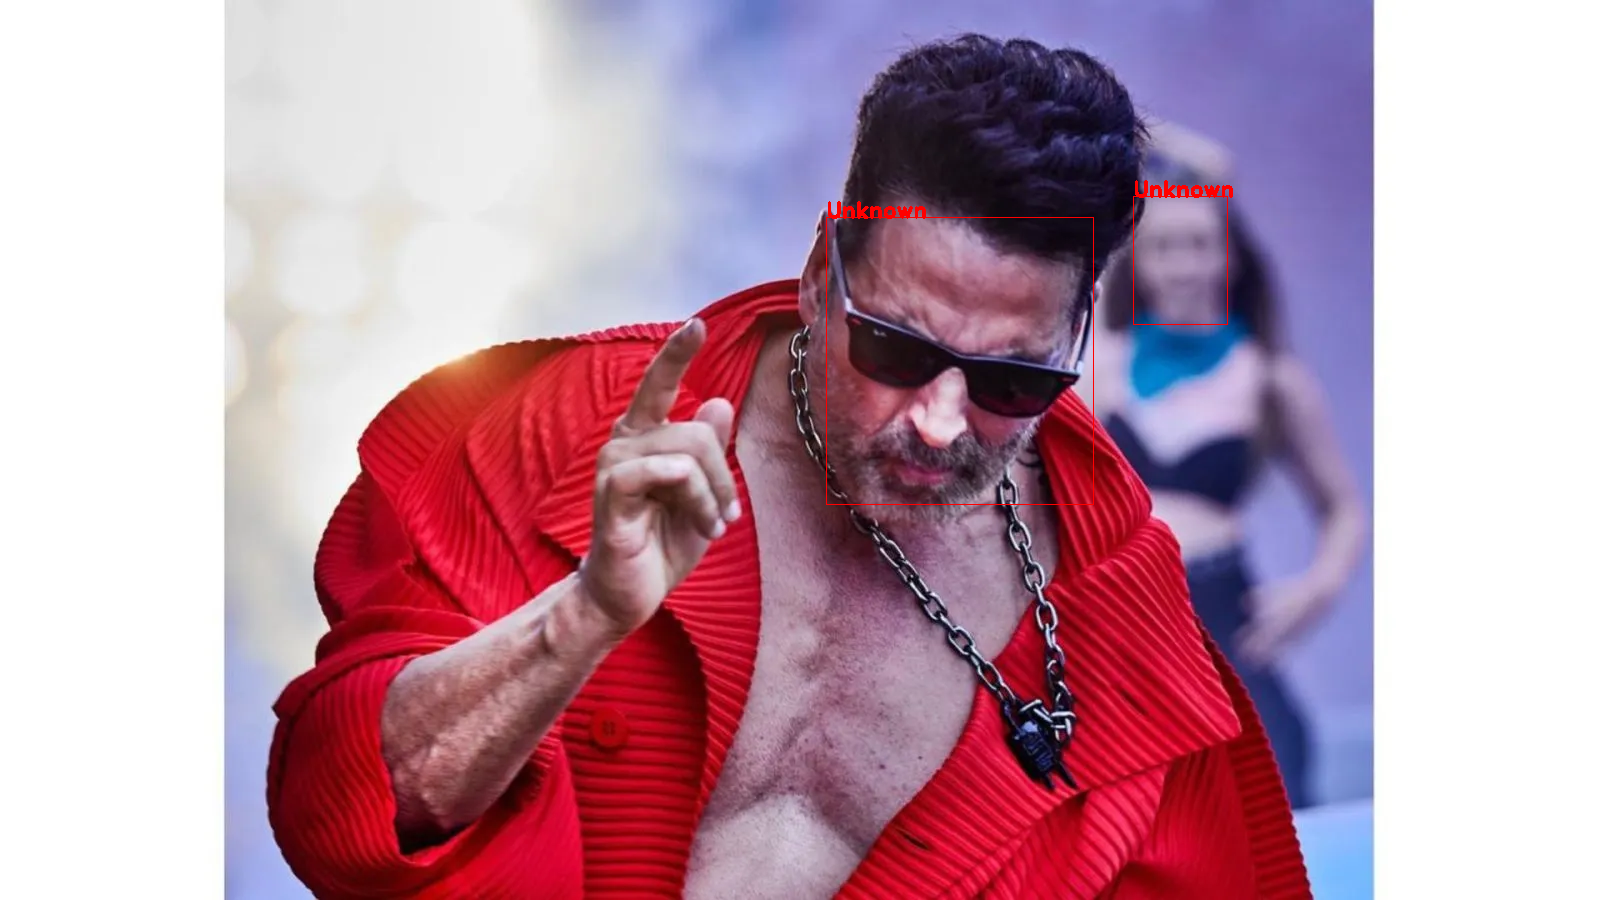

In [153]:
# step-1: take the test image and apply to insight face
results = faceapp.get(test_image)
test_copy = test_image.copy()
# step-2: use for loop and extract each embedding and pass to ml_search_algorithm

for res in results:
    x1, y1, x2, y2 = res['bbox'].astype(int)
    embeddings = res['embedding']
    person_name, person_role = ml_search_algorithm(dataframe_compress,
                                                   'Facial_Features',
                                                   test_vector=embeddings,
                                                   name_role=['Name','Role'],
                                                   thresh=0.5)
    if person_name == 'Unknown':
        color =(0,0,255) # bgr
    else:
        color = (0,255,0)


    cv2.rectangle(test_copy,(x1,y1),(x2,y2),color)

    text_gen = person_name
    cv2.putText(test_copy,text_gen,(x1,y1),cv2.FONT_HERSHEY_DUPLEX,0.7,color,2)


cv2_imshow(test_copy)
cv2.waitKey()
cv2.destroyAllWindows()

### Compressing my dataset

#### convert dataframe into array and save in numpy zip format

In [134]:
xvalues = dataframe_compress.values

In [135]:
col_name = np.array(dataframe_compress.columns)
col_name

array(['Name', 'Role', 'Facial_Features'], dtype=object)

In [136]:
np.savez('dataframe_students_teacher.npz',xvalues,col_name)

In [137]:
# load the numpy zip
file_np = np.load('dataframe_students_teacher.npz',allow_pickle=True)
file_np.files

['arr_0', 'arr_1']

In [138]:
pd.DataFrame(file_np['arr_0'],columns=file_np['arr_1'])

Name     Role  \
0        Akshay Kumar  Teacher   
1      Angelina Jolie  Student   
2        Barack Obama  Teacher   
3         Chris Evans  Student   
4      Morgan Freeman  Teacher   
5              Nafees  Student   
6               Nayem  Student   
7            Prosanto  Student   
8  Scarlett Johansson  Student   
9                  Sj  Student   

                                     Facial_Features  
0  [-0.51121765, -1.1796902, 0.0824021, 0.0420701...  
1  [0.4324204, 1.0748498, -0.12862366, -1.8332916...  
2  [0.94858104, -0.5584052, 0.094820715, -1.27965...  
3  [0.7201716, -1.4684149, -0.7781253, -1.4601073...  
4  [0.485351, -0.6192555, -0.40699324, 1.0687788,...  
5  [-1.6465464, -0.4757456, 0.80025, 0.20509891, ...  
6  [0.994645, -1.7220091, -0.8817088, 0.6327459, ...  
7  [-0.46057177, 0.74854827, 0.007050243, 0.69136...  
8  [0.19131963, -0.48843807, -1.690233, 0.4423967...  
9  [0.63077176, -0.020374846, -0.32993656, 1.1410...

### [END](https://www.udemy.com/user/freeai-space/)
---